In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-in-youth-of-india/heart_attack_youngsters_india.csv


In [24]:
df = pd.read_csv('/kaggle/input/heart-attack-in-youth-of-india/heart_attack_youngsters_india.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Gender                                    10000 non-null  object 
 2   Region                                    10000 non-null  object 
 3   Urban/Rural                               10000 non-null  object 
 4   SES                                       10000 non-null  object 
 5   Smoking Status                            10000 non-null  object 
 6   Alcohol Consumption                       10000 non-null  object 
 7   Diet Type                                 10000 non-null  object 
 8   Physical Activity Level                   10000 non-null  object 
 9   Screen Time (hrs/day)                     10000 non-null  int64  
 10  Sleep Duration (hrs/day)           

In [26]:
df.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,High,137.5/110.7,76,Normal,Non-anginal,118,No,97.1,341,No
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,Low,138.3/76.6,86,Normal,Typical,164,No,92.7,373,Yes
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,Low,130.7/108.8,73,Normal,Atypical,216,No,94.9,235,No


<Axes: >

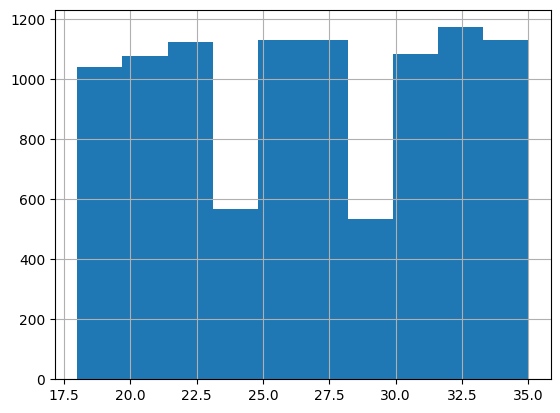

In [27]:
df.Age.hist()

<Axes: xlabel='Gender'>

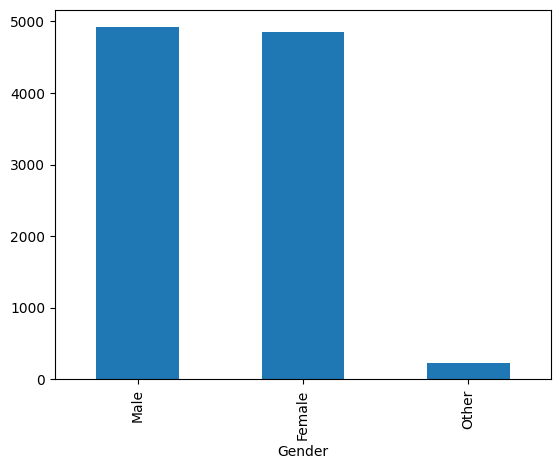

In [28]:
df.Gender.value_counts().plot.bar()

In [29]:
df.Region.value_counts()

Region
Central       1746
North         1700
South         1664
East          1658
West          1643
North-East    1589
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

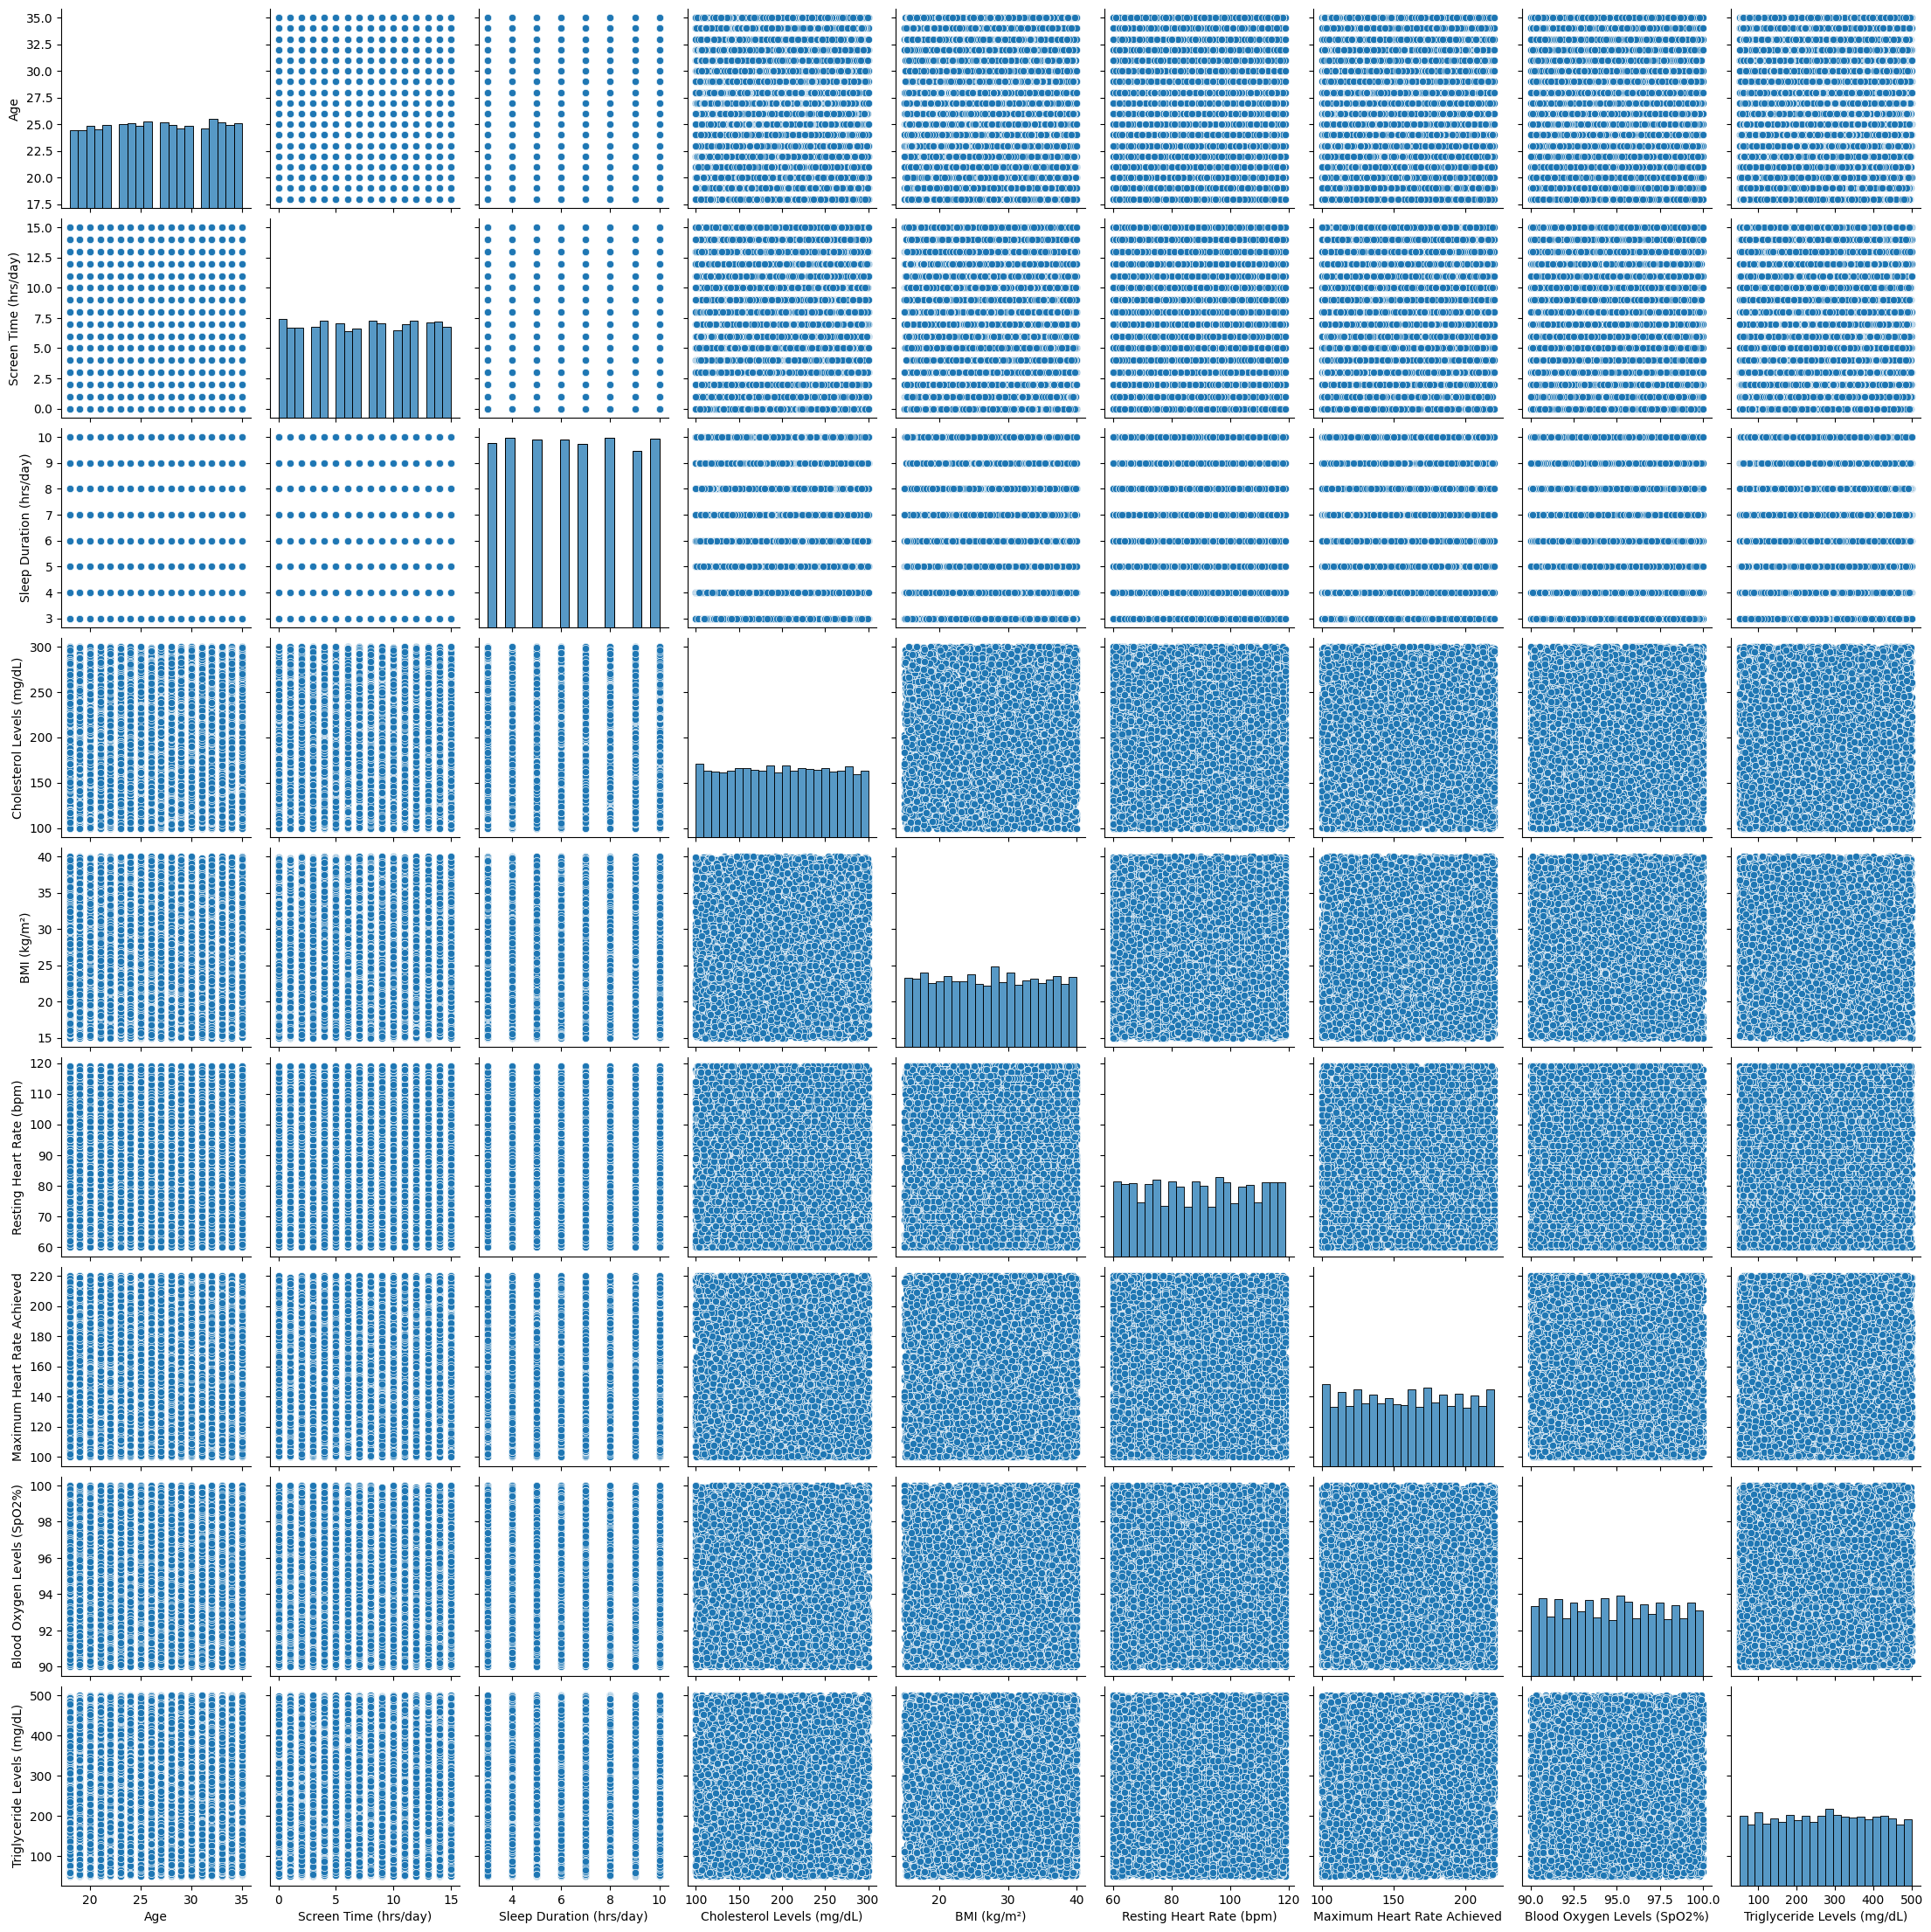

In [30]:
sns.pairplot(df.select_dtypes('number'))

In [33]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
for i in df.select_dtypes('number').columns.tolist():
    df[i] = scale.fit_transform(df[i].values.reshape(-1,1))

In [34]:
data_encoded = pd.get_dummies(data=df, columns=df.drop(columns='Heart Attack Likelihood').select_dtypes('object').columns.tolist(),dtype=int)
data_encoded.head()

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood,...,Blood Pressure (systolic/diastolic mmHg)_180.0/85.2,Blood Pressure (systolic/diastolic mmHg)_180.0/89.8,ECG Results_Abnormal,ECG Results_Normal,Chest Pain Type_Asymptomatic,Chest Pain Type_Atypical,Chest Pain Type_Non-anginal,Chest Pain Type_Typical,Exercise Induced Angina_No,Exercise Induced Angina_Yes
0,0.658116,-0.975003,0.659790,-0.897322,0.963275,-0.432710,0.665560,-0.291598,-1.684605,No,...,0,0,0,1,0,0,1,0,1,0
1,-0.503778,1.618837,1.096622,-1.314286,-0.338055,-0.779183,-1.189871,0.748918,0.512266,No,...,0,0,0,1,0,0,1,0,1,0
2,-0.503778,1.618837,-1.524367,0.979012,0.894055,-0.201728,0.123203,-0.777172,0.760676,Yes,...,0,0,0,1,0,0,0,1,1,0
3,0.077169,-0.326543,0.222959,-1.088431,-1.168691,0.953182,0.808286,1.199809,-1.343042,Yes,...,0,0,0,1,0,0,1,0,1,0
4,-1.084725,-0.758849,1.096622,1.083253,0.077263,-0.952419,1.607549,-0.014127,-0.310590,No,...,0,0,0,1,0,1,0,0,1,0


In [35]:
data_encoded['Heart Attack Likelihood'] = data_encoded['Heart Attack Likelihood'].apply(lambda a: 1 if a=='Yes' else 0)

In [37]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
x = data_encoded.drop(columns='Heart Attack Likelihood')
y = data_encoded[['Heart Attack Likelihood']]

rf = RandomForestClassifier(n_jobs=3)
kf = KFold(n_splits=6, shuffle=True, random_state=1)
cv = -cross_val_score(rf,x,y,scoring='neg_mean_squared_error')
cv.mean()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.20379999999999998

In [38]:
cv = cross_val_score(rf, x,y)
cv.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.7962000000000001

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=1)

log = LogisticRegression()
log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
log.score(X_test, y_test)

0.808

The Logistic Regression model performs better with a R2 score of 80%; meaning that 80% of the variation in the target variable can be explained by the predictor variables.

In [50]:
from sklearn.metrics import roc_curve
roc_auc_score(y_test,log.predict_proba(X_test)[:,1])

0.5079548267326732

Text(0, 0.5, 'True Positive Rate')

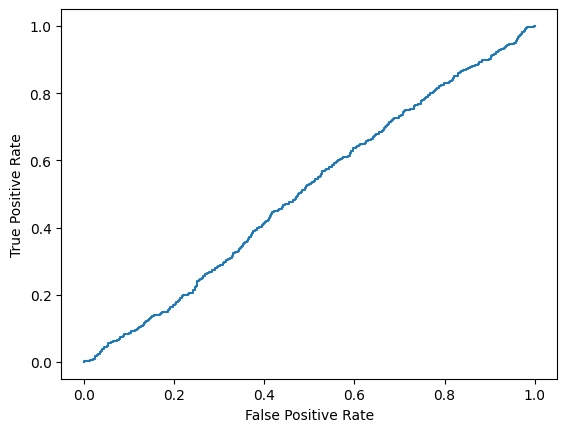

In [52]:
fpr, tpr, _ = roc_curve(y_test, log.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [53]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.5079548267326732

The model is no better than random guessing; having an AUC score of 0.5